![](https://cropper.watch.aetnd.com/cdn.watch.aetnd.com/sites/2/2018/05/States_california-hollywood-sign.jpg)

# About the Notebook- An Introduction!!!

This Kernel has been used to perform an exploratory Data Analysis on the Top movies of the 20th Century. The total number of Movies that have been considered is about 1600. The Period in which the movies have been considered is ranging from 1920 to late 1990s. This era has been extremely appreciated for producing Quality movies which are highly acclaimed and appreciated even now.
So lets enjoy the analysis- with a pon corn.
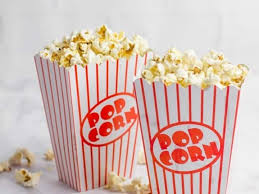

# Importing the Libraries and Ingesting the File!

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading the file

In [ ]:
movie=pd.read_csv('/kaggle/input/top-movies-database-19202000s/Movie Dataset.csv',encoding='latin1')
movie.head()

# Identifying the Null entries!!!

In [ ]:
movie.isnull().sum()

**Observation** We see there are multiple null entries for the columns. But since the dataset is small, we shall not exclude all of them at once. We shall move ahead with them and clean them as per our necessity to obtain the maximum information

# Identifying the data types

In [ ]:
movie.dtypes

**Observations** The data types are perfectly suited to our requirement. Since we are good regarding understanding of the data,we can start out analysis now!

# The Analysis

# How has the number of Movies released vary with Time?

In [ ]:
yr_cnt=movie.groupby('Year').apply(lambda x:x['Title'].count()).reset_index(name='Count')
fig = px.bar(yr_cnt, y='Count', x='Year', text='Count',title='Number of Succesful Movies launched by year of the 20th Century')
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.update_layout(uniformtext_minsize=8, uniformtext_mode='hide')
fig.show()

**Observation** As per the data set available to us, We notice that the number of movies released every year has increased. But this is subjected to the completedness of the dataset. as we see beyond 1990, the data is not very rich hence a detailed analysis could not be done for that part. But considering 1930-90, we might be able to infer that the number of movies released have risen

# Which Movie Genre has been the most popular over the Years? Which Genres have grown over time?

![](https://previews.123rf.com/images/luplupme/luplupme1706/luplupme170600813/81127129-cinema-genre-icons-set-cinematography-flat-entertainment-comedy-drama-thriller-movie-production-symb.jpg)

In [ ]:
yr_cnt=movie.groupby(['Year','Subject']).apply(lambda x:x['Title'].count()).reset_index(name='Count')
plt.figure(figsize=(12,8))
fig = px.area(yr_cnt, x="Year", y="Count",color="Subject",title='Count of Movies Genres by the Years')
fig.show()

**Observations** Overall with time, each and every genre has seen a raise in the number of movies launced. Romance has been a constant favourite Genre of the viewers. Genres like War have gained a boost after 1930s- which might be a hint to the after World War I era- as well as building up tension phase between the nations. Genres like Crime, Horror, Western too have seen an increase with time.

# Did the Movie Time vary over the Years?

In [ ]:
movie_len=movie[movie['Length'].isnull()==False]
movie_length=movie_len.groupby('Year').apply(lambda x:np.average(x['Length'])).reset_index(name='Average_Length')
plt.figure(figsize=(8,8))
sns.regplot(movie_length['Year'],movie_length['Average_Length'],color='red',logx=True)
plt.xlabel('Years',size=15)
plt.ylabel('Average Movie Length',size=15)
plt.title('Variation of Movie Length over the Years',size=20)


**Observation** Performing a basic regression, we see that the General movie timings have increased with the passing by time. However there are many outliers to the plot indicating the extent of variation. But the average time during the 70-80s have been highest, which further went down in the 90s

# What is the Average movie time for each Genre over the Years?

In [ ]:
yr_sub_avg=movie.groupby(['Year','Subject']).apply(lambda x:x['Length'].mean()).reset_index(name='Average Movie Time')
plt.figure(figsize=(12,8))
fig = px.area(yr_sub_avg, x="Year", y="Average Movie Time",color='Subject')
fig.show()

**Observation** As seen previously, the movie times have increased with the passing years, so is presented in the baove graph. Genres like Drama have been almost constant in the movie length- on the other hand, genres like romance have increased drastically- taking up the top spot in terms of the longest movies.

# Has the length of Movie Time over the Years impact the popularity of the movie?

![](https://static.rogerebert.com/uploads/movie/movie_poster/war-and-peace-1969/large_wiN9njk9YRzwAiwXI2W5SGNsGeK.jpg)

**In Picture:** The 1968 Movie, War and Peace- that holds the position for being the most popular lengthy film in the era

In [ ]:
movie_check=movie[movie['Popularity'].isnull()==False]
movie_len_pop=movie_check[['Length','Year','Popularity','Title','Director','Actor','Actress']]
fig = px.scatter(movie_len_pop, x='Year', y='Length',
                size='Popularity',color='Popularity',
                 hover_data=['Title','Director','Actor','Actress'],
                 title='Variation of Movie Length over the years, and estimating its populartiy')
fig.show()

# Which have been the most popular movies of the 20th century by Genre?

![](https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRohYQrI8_cEUmxMKoBCTBTRZsbtSf_yrBJIRtuTAF8CK1zkkN2)

In [ ]:
movie_pop=movie[['Title','Year','Popularity','Subject']]
movie_pop.sort_values(by='Popularity',ascending=False,inplace=True)
movie_top=movie_pop[['Year','Title','Subject']][:20]
print('The Top 20 most popular movies are:\n',movie_top)

# Let's create a Word Cloud from  the Movie Names

In [ ]:
word_list=movie.Title.tolist()
strr=''
for i in word_list:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',collocations=False,  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'grey') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud using the Movie Names',size=40)

# Who were the Top 10 Actors of the Century?

![](https://upload.wikimedia.org/wikipedia/commons/7/7b/John_Wayne_-_still_portrait.jpg)

**In Picture** Marion Michael Morrison, known professionally as John Wayne and nicknamed Duke, was an American actor, director, producer and Presidential Medal of Freedom recipient. He was among the top box office draws for three decades, famous for his roles in Western films.

In [ ]:
actor_cnt=movie.groupby('Actor').apply(lambda x:x['Title'].count()).reset_index(name='Movie Counts')
actor_cnt.sort_values(by='Movie Counts',ascending=False,inplace=True)
top_actor=actor_cnt[:10]
fig = px.bar(top_actor, x='Actor', y='Movie Counts',
             color='Movie Counts',title='Top 10 Actors who have acted in most number of Movies ')
fig.show()
movie_actor=movie[movie['Actor'].isnull()==False]
word_list_2=movie_actor.Actor.tolist()
strr=''
for i in word_list_2:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',collocations=False,  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'cyan') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud using the Movie Actor names',size=40)

# Who have been the Top 10 Actress of the 10th Century?

![](https://www.scandinaviastandard.com/wp-content/uploads/2018/08/ingrid-bergman-portrait-of-sweden-Scandinavia-Standard.jpg)

**In Picture** Ingrid Bergman was a Swedish actress who starred in a variety of European and American films, television movies, and plays. Famed for her natural beauty, Bergman was the most popular actress of the 1940s.

In [ ]:
actress_cnt=movie.groupby('Actress').apply(lambda x:x['Title'].count()).reset_index(name='Movie Counts')
actress_cnt.sort_values(by='Movie Counts',ascending=False,inplace=True)
top_actress=actress_cnt[:10]
fig = px.bar(top_actress, x='Actress', y='Movie Counts',
             color='Movie Counts',title='Top 10 Actresses who have acted in most number of Movies ')
fig.show()
movie_actress=movie[movie['Actress'].isnull()==False]
word_list_2=movie_actress.Actress.tolist()
strr=''
for i in word_list_2:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='white',collocations=False,  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'pink') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud using the Movie Actress names',size=40)

# Who have been the most succesful Directors of the 20th Century?

![](https://m.media-amazon.com/images/M/MV5BMTQxOTg3ODc2NV5BMl5BanBnXkFtZTYwNTg0NTU2._V1_UX214_CR0,0,214,317_AL_.jpg)

**In Picture** Sir Alfred Joseph Hitchcock KBE was an English film director, producer and screenwriter. He is one of the most influential and extensively studied filmmakers in the history of cinema

In [ ]:
director_cnt=movie.groupby('Director').apply(lambda x:x['Title'].count()).reset_index(name='Movie Counts')
director_cnt.sort_values(by='Movie Counts',ascending=False,inplace=True)
top_director=director_cnt[:10]
fig = px.bar(top_director, x='Director', y='Movie Counts',
             color='Movie Counts',title='Top 10 Directors who have directed most number of Movies ')
fig.show()
movie_director=movie[movie['Director'].isnull()==False]
word_list_2=movie_director.Director.tolist()
strr=''
for i in word_list_2:
    strr=strr+i+' '
wordcloud = WordCloud(width = 1200, height = 1200, 
                background_color ='black',collocations=False,  
                min_font_size = 12).generate(strr) 
plt.figure(figsize = (8, 8), facecolor = 'grey') 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0)
plt.title('WordCloud using the Movie Director names',size=40)

# The Top 10 Actor-Actress Pairs who have features in the 20th Century?

![](https://imageproxy.themaven.net//https%3A%2F%2Fwww.biography.com%2F.image%2FMTcyNTQ5NjcyNTA4ODYwMzMw%2Fgettyimages-686940555.jpg)

**In Picture** Katharine Hepburn and Spencer Tracy were a legendary cinematic couple, both on- and off-screen. They starred in nine films together, and had an affair - an open secret in Hollywood - that lasted 26 years, ending only with Tracy's death.

In [ ]:
act_cnt=movie.groupby(['Actor','Actress']).apply(lambda x:x['Title'].count()).reset_index(name='Movie Counts')
act_cnt.sort_values(by='Movie Counts',ascending=False,inplace=True)
print('The Top 10 Actress of the 20th Century were:\n',act_cnt[:10])

# How popular were the actor pairs?

![](https://live.staticflickr.com/3875/15164046569_7ff1728bd7_b.jpg)

**In Picture** Melissa Sue Anderson and Glenn Ford on set of Happy Birthday to Me, 1980

In [ ]:
act_pop=movie.groupby(['Actor','Actress']).apply(lambda x:x['Popularity'].mean()).reset_index(name='Average Popularity')
act_overall=pd.merge(act_cnt,act_pop,how='inner',left_on=['Actor','Actress'],right_on=['Actor','Actress'])
fig = px.scatter(act_overall, x="Movie Counts", y="Average Popularity",
                 size="Movie Counts",color="Average Popularity",
                 hover_data=['Actor','Actress'],
                 title='Popularity vs Movie count metrics for the most succesful Hollywood pairs of the 20th Century')
fig.show()

# Most Popular Director-Actor-Actress pair of the era?

![](https://c8.alamy.com/comp/E5N7JN/boss-of-bullion-city-from-left-nell-oday-johnny-mack-brown-fuzzy-knight-E5N7JN.jpg)

**In Picture** Boss of Bullion City is a 1940 American Western film directed by Ray Taylor and starring Johnny Mack Brown. Nell o'Day appears as the female lead. It was the first time she played a leading role and was the only one of her film roles where she speaks some Spanish.

In [ ]:
cast_cnt=movie.groupby(['Director','Actor','Actress']).apply(lambda x:x['Title'].count()).reset_index(name='Movie Counts')
cast_cnt.sort_values(by='Movie Counts',ascending=False,inplace=True)
cast_pop=movie.groupby(['Director','Actor','Actress']).apply(lambda x:x['Popularity'].mean()).reset_index(name='Average Popularity')
cast_overall=pd.merge(cast_cnt,cast_pop,how='inner',left_on=['Director','Actor','Actress'],right_on=['Director','Actor','Actress'])
fig = px.scatter(cast_overall, x="Movie Counts", y="Average Popularity",
                size="Movie Counts",color="Average Popularity",
                 hover_data=['Director','Actor','Actress'],
                 title='Popularity vs Movie count metrics for the most succesful Hollywood Cast (Director and Actors)')
fig.show()

# Who have been the most versatile actors (Actors who have acted in multiple Genres)??

![](https://www.rollingstone.com/wp-content/uploads/2018/06/ClintEastwood-1.jpg)

![](https://www.gotceleb.com/wp-content/uploads/photos/michelle-pfeiffer/ant-man-and-the-wasp-premiere-in-los-angeles/Michelle-Pfeiffer:-Ant-Man-and-The-Wasp-Premiere--05.jpg)

**In Pictures** (above) Clint Eastwood (below) Michelle Pfeiffer

In [ ]:
actor_genre=movie.groupby('Actor').apply(lambda x:x['Subject'].nunique()).reset_index(name='# Genres')
actress_genre=movie.groupby('Actress').apply(lambda x:x['Subject'].nunique()).reset_index(name='# Genres')
actor_genre.sort_values(by='# Genres',ascending=False,inplace=True)
actress_genre.sort_values(by='# Genres',ascending=False,inplace=True)
top_actor_genre=actor_genre[:10]
top_actor_genre['Gender']='Male'
top_actress_genre=actress_genre[0:10]
top_actress_genre['Gender']='Female'
top_actor_genre.columns=['Performer',"# Genres",'Gender']
top_actress_genre.columns=['Performer',"# Genres",'Gender']
top_performer_genre=pd.concat([top_actor_genre,top_actress_genre])
fig = px.scatter(top_performer_genre, x='Performer', y='# Genres',
                size='# Genres',color='Gender',
                 hover_data=['Performer'],
                 title='Top Performers of the 20th century who have worked in multiple Genres')
fig.show()

# Let us deep dive into the Genres in which the Top Actors/Actresses have acted in.

In [ ]:
movie_filter=movie[movie['Title'].isnull()==False]
movie_filter=movie_filter[movie_filter['Actor'].isin(top_actor_genre.Performer.tolist())]
movie_filter=movie_filter[movie_filter['Subject'].isnull()==False]
actor_genre=movie_filter.groupby(['Actor','Subject']).apply(lambda x:x['Title'].count()).reset_index(name='# Genres wise Movies')
plt.figure(figsize=(8,10))
pivot_actor=pd.pivot(actor_genre,index='Actor',columns='Subject',values='# Genres wise Movies')
ax=sns.heatmap(pivot_actor,annot=True,fmt='g',cmap='Spectral_r')
plt.xlabel('Genres',size=20)
plt.ylabel('Actors',size=25)
plt.title('Genre wise filmography of the most verstaile Actors',size=20)
movie_filter_2=movie[movie['Title'].isnull()==False]
movie_filter_2=movie_filter_2[movie_filter_2['Actress'].isin(top_actress_genre.Performer.tolist())]
movie_filter_2=movie_filter_2[movie_filter_2['Subject'].isnull()==False]
actress_genre=movie_filter_2.groupby(['Actress','Subject']).apply(lambda x:x['Title'].count()).reset_index(name='# Genres wise Movies')
plt.figure(figsize=(8,10))
pivot_actress=pd.pivot(actress_genre,index='Actress',columns='Subject',values='# Genres wise Movies')
ax=sns.heatmap(pivot_actress,annot=True,fmt='g',cmap='copper_r')
plt.xlabel('Genres',size=20)
plt.ylabel('Actresses',size=25)
plt.title('Genre wise filmography of the most verstaile Actresses',size=20)

# Who has been the most versatile Director?

![](https://www3.pictures.gi.zimbio.com/12th+Annual+Critic+Choice+Awards+Show+H_7hw2J-Mzhx.jpg)

**In Picture** Clint Eastwood and Steven Speilberg

In [ ]:
director_genre=movie.groupby('Director').apply(lambda x:x['Subject'].nunique()).reset_index(name='# Genres')
director_genre.sort_values(by='# Genres',ascending=False,inplace=True)
top_director_genre=director_genre[:10]
fig = px.scatter(top_director_genre, x='Director', y='# Genres',
                size='# Genres',color='Director',
                 hover_data=['Director'],
                 title='Top Directors of the 20th century who have worked in multiple Genres')
fig.show()
dir_movie=movie[movie['Director'].isin(top_director_genre.Director.tolist())]
director_genre=dir_movie.groupby(['Director','Subject']).apply(lambda x:x['Title'].count()).reset_index(name='# Genres wise Movies')
plt.figure(figsize=(8,10))
pivot_director=pd.pivot(director_genre,index='Director',columns='Subject',values='# Genres wise Movies')
ax=sns.heatmap(pivot_director,annot=True,fmt='g',cmap='autumn_r')
plt.xlabel('Genres',size=20)
plt.ylabel('Directors',size=25)
plt.title('Genre wise filmography of the most verstaile Directors',size=20)

# Actors/Actresses who have acted in more than one movie, and also directed movies

![](https://4.bp.blogspot.com/-Litc_9o9ZQ8/UvqMSV4Yv0I/AAAAAAAAMAE/HNYQdjcb-FA/s1600/Clint_Hitch.JPG)

**In Picture** Clint Esatwood and Alfred Hitchcock

In [ ]:
act_movies=movie.groupby('Actor').apply(lambda x:x['Title'].count()).reset_index(name='Acted in Movies')
actr_movies=movie.groupby('Actress').apply(lambda x:x['Title'].count()).reset_index(name='Acted in Movies')
actr_movies.columns=['Actor','Acted in Movies']
acted_movies=pd.concat([act_movies,actr_movies])
acted_movies=acted_movies[acted_movies['Acted in Movies']>1]
dir_movies=movie.groupby('Director').apply(lambda x:x['Title'].count()).reset_index(name='Directed Movies')
act_dir_movies=pd.merge(acted_movies,dir_movies,how='inner',left_on='Actor',right_on='Director')
act_dir_movies=act_dir_movies[act_dir_movies['Directed Movies']>1]
fig = px.scatter(act_dir_movies, x='Acted in Movies', y='Directed Movies',color='Acted in Movies',size='Acted in Movies',
                 hover_data=['Actor'],
                 title='Artists who have acted and directed more than 1 movies')
fig.show()

# How has the movie length impacted awards over the Years?

![](https://pmcvariety.files.wordpress.com/2020/06/oscar-statues.jpg)

In [ ]:
award_movies=movie[movie['Awards']=='Yes']
no_award_movies=movie[movie['Awards']!='Yes']
award_filter=movie[movie['Awards'].isnull()==False]
award_filter=award_filter[award_filter['Length'].isnull()==False]
award_filter=award_filter[award_filter['Year'].isnull()==False]
award_time_yr=award_filter.groupby(['Year','Awards']).apply(lambda x:np.average(x['Length'])).reset_index(name='Movie Time')
fig = px.line(award_time_yr, x="Year", y="Movie Time", color='Awards',title='Movie Time impacting Awards over the Years')
fig.show()

**Observations** The award-winning movies generally longer than the non-award winning movies. But the average times have fluctuated a lot over the years. Overall the times have increased- but not at a comparable rate

In [ ]:
award_filter=movie[movie['Awards'].isnull()==False]
award_filter=award_filter[award_filter['Popularity'].isnull()==False]
award_filter=award_filter[award_filter['Year'].isnull()==False]
award_time_yr=award_filter.groupby(['Year','Awards']).apply(lambda x:np.average(x['Popularity'])).reset_index(name='Popularity')
fig = px.scatter(award_time_yr, x="Year", y="Popularity", color='Awards',size='Popularity',title='Popularity affecting the Awards over the years')
fig.show()

**Observation** In the earlier days popularity actually dominated the awards for the movies. But with an increasing time-popularity didn't play a very significant role.Much less popular films have won awards- due to their significant quality and message. 

# Which Actor, Actress and Directors have won the most number of Awards?

![](https://m.media-amazon.com/images/M/MV5BODUwMDYwNDg3N15BMl5BanBnXkFtZTcwODEzNTgxMw@@._V1_UY317_CR22,0,214,317_AL_.jpg)![](https://images-na.ssl-images-amazon.com/images/I/81DPhRTx6zL._AC_SX679_.jpg)

**In Picture** (above) Paul Neumann (below) Ingmar Bergman and Ingrid Bergman

In [ ]:
actor_award=award_movies.groupby('Actor').apply(lambda x:x['Awards'].count()).reset_index(name='# Awards')
actress_award=award_movies.groupby('Actress').apply(lambda x:x['Awards'].count()).reset_index(name='# Awards')
director_award=award_movies.groupby('Director').apply(lambda x:x['Awards'].count()).reset_index(name='# Awards')
actor_award.sort_values(by="# Awards",ascending=False,inplace=True)
actress_award.sort_values(by="# Awards",ascending=False,inplace=True)
director_award.sort_values(by="# Awards",ascending=False,inplace=True)
top_actor_award=actor_award[:10]
top_actor_award['Category']='Actor'
top_actress_award=actress_award[0:10]
top_actress_award['Category']='Actress'
top_director_award=director_award[0:10]
top_director_award['Category']='Director'
top_actor_award.columns=['Artist',"# Awards",'Category']
top_actress_award.columns=['Artist',"# Awards",'Category']
top_director_award.columns=['Artist',"# Awards",'Category']
top_artist_award=pd.concat([top_actor_award,top_actress_award,top_director_award])
fig = px.bar(top_artist_award, x='Artist', y="# Awards",
                color='Category',
                 hover_data=['Artist'],
                 title='Top Artists of the 20th century who have won most Awards')
fig.show()

# Which Genre has fetched in the most number of Awards?

In [ ]:
genre_award=movie.groupby(['Subject','Awards']).apply(lambda x:x['Title'].count()).reset_index(name='Counts')
piv_genre_count=pd.pivot(genre_award,index='Subject',columns='Awards',values='Counts')
plt.figure(figsize=(4,8))
sns.heatmap(piv_genre_count,annot=True,fmt='g',cmap='inferno_r')
plt.xlabel('Won Awards?',size=15)
plt.ylabel('Genres',size=15)
plt.title('Summary of Awards won by the Genres',size=20)

**Observation** What we see from this dataset- most numbe rof movies have been from the Drama Genre- asnd likewise- it has also earned the most number of awards. Comedy of this Genre has been a delight- and that can be seen from the awards too. Something that really excites me is the Science Fiction awards. This genre got promoted with the advent of computers- but has grown really good in this era.

# Conclusion:

We have explored the data understanding the filmography and how the Movie patterns have changed over the years. There are a few points that I would like to highlight upon:

1. The movie timings have increase over the Years. Although the movie lengths were at its peak in the 1970s-80s, and went down slightly during the 90s- The overall graph is moving towards an increasing slope.
2. This era has seen almost equal participation by men and women- which showed the gender equality and modernism in the era. Actresses have performed amazing roles and have won popularity and fame at par with their male counterparts.
3. Another point which I would like to mention is the great versatility by the artist of that time. Actors, Actresses, Directors- all have tried to explore different horizons- and to establish a relishing experience for the viewers. Undoubtedly we have been gifted some classics by this era.
4. This era really stressed a lot upon Drama as a genre- and has fetched the most number of awards in that genre too. But overall all the genres have been explored and appreciated. The World Wars, advent of computers have really helped upon bring amazing Genres like War and Science Fiction- which are the hotcakes of today's world.
5. Generally the award winning films have been slightly longer. Although not much information was available as per the data hence we have not been able to explore much in taht context. With respect to the popularity, in the earlier part of 1900s, popularity dominated the awards- but this pattern looked insignificant with passing years- as many unpopular movies have been awarded too.

Would like to add a few points on the Data perspective:
1. The data although small is rich- and hence performing the data analysis was really helpful. Overall it was a good data to work with.
2. Some improvements like Award names and Award receiving Year information would help to understand the impact of a movie and how have the people responded to it over the Years. Also the popularity category would need some further clarity.

Overall, we have received many classics from this era- that would be cherished forever. So undoubtedly we can call this a golden period of English Cinema- a century that made us laugh, cry, happy, sad- but overall love the world of "Cinema"!!!

![](https://media.tenor.com/images/edc37bab6bcf2303917b718bbd497ced/tenor.gif)


# Please upvote if you liked the Analysis!!!